# EPA Greenhouse Gas Emissions API


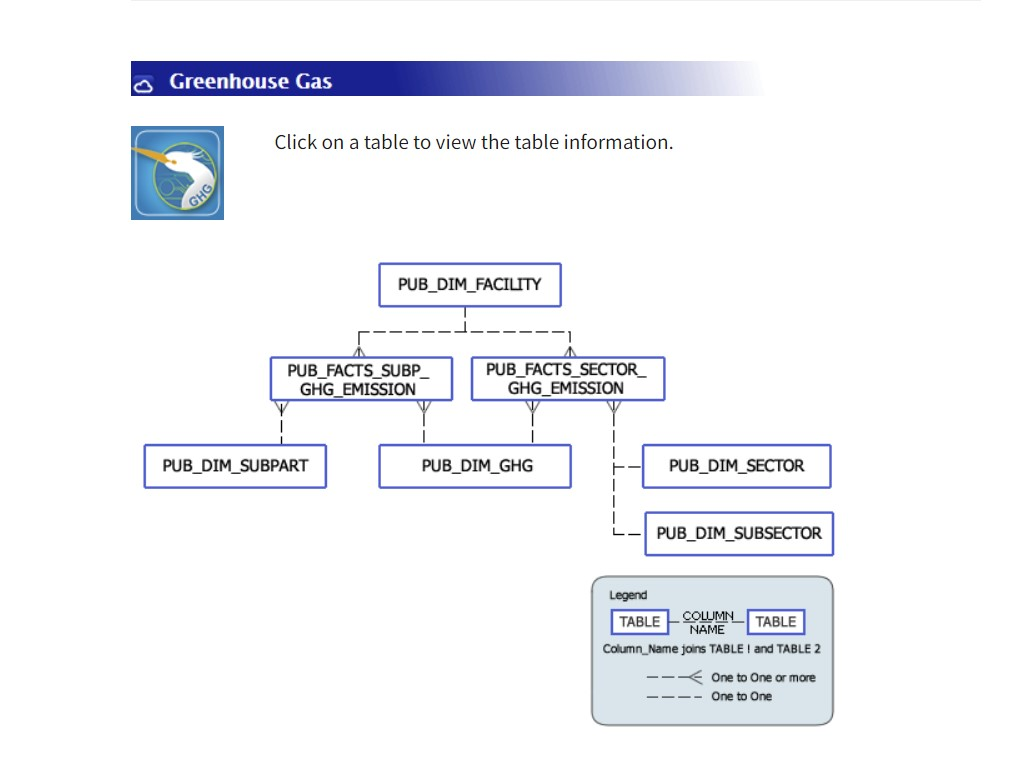

In [1]:

import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

Their restful API creates a query into their database by creating a url of the specific tables you want to pull. Along with the table, you can specify state, county, area code, year and how many rows you want. For this I wanted everything to I didn't specify anyhting but the output format. I specifically chose 6 tables from the main greenhouse gas summary table.

In [2]:
#Define the tables I want to pull from Epa Website. In our case we don't want to make it too specific so we wont specify 

table_names=['PUB_DIM_FACILITY', 'PUB_FACTS_SECTOR_GHG_EMISSION',
                 'PUB_DIM_SECTOR', 'PUB_DIM_SUBSECTOR', 'PUB_DIM_GHG']

epa_url ='https://data.epa.gov/efservice/'
output = 'CSV'


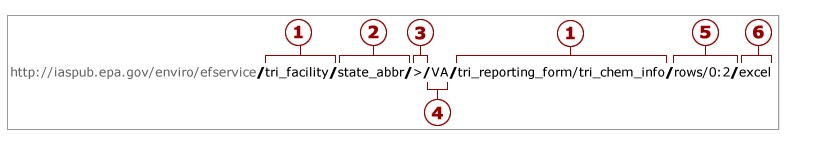

In [3]:
#construct query replace        
def url_EPA(table_name, output, epa_url):
        """
        Function creates our URL that we insert to query.
        """
        #Base of the query that we're going to build off of
        query_base=epa_url
        #Add in the table name
        query=query_base+table_name+'/'
        query=query+output
        
        return query
    

def query_EPA(query):
        """
        Here we run the query to the API and return the results of a table query into a dataframe.
        """
        s=requests.get(query).content
        dataframe=pd.read_csv(io.StringIO(s.decode('utf-8')), engine='python',
                              encoding='utf-8', on_bad_lines='skip')
        return dataframe
            
        

In [6]:
def GHG_data(table_names):
    #WE must specify the tables we want to include. We are only pulling from the summary tables from the API, but perhaps this 
    #functionality will allow us to pull from other sections.
    selected_table_names=['PUB_DIM_FACILITY', 'PUB_FACTS_SECTOR_GHG_EMISSION',
                 'PUB_DIM_SECTOR', 'PUB_DIM_SUBSECTOR', 'PUB_DIM_GHG']
    
    #Dict to store all info
    epa_dfs={}
    

    
    #Query every table in the list about. Then put into dataframe.
    for table_name in selected_table_names:
    
        query=url_EPA(selected_table_name, output, epa_url)
        
        #Pull in via the URL, and generate a pandas df, 
        #which is then saved into a dictionary of dataframes called
        #EPA_dfs for future reference

        epa_dfs[table_name]=query_EPA(query)

    #Mer
    #Use merge for PUB_DIM_FACILITY and PUB_FACTS_SECTOR_GHG_EMISSION and create ghg_df
    ghg_df=pd.merge(epa_dfs['PUB_DIM_FACILITY'], epa_dfs['PUB_FACTS_SECTOR_GHG_EMISSION'],
                       left_on=['PUB_DIM_FACILITY.FACILITY_ID', 'PUB_DIM_FACILITY.YEAR'],
                       right_on=['PUB_FACTS_SECTOR_GHG_EMISSION.FACILITY_ID',
                                 'PUB_FACTS_SECTOR_GHG_EMISSION.YEAR'], how='left')
    #Use merge ghg_df with PUB_DIM_SECTOR
    ghg_df=pd.merge(ghg_df, epa_dfs['PUB_DIM_SECTOR'], 
                       left_on='PUB_FACTS_SECTOR_GHG_EMISSION.SECTOR_ID',
                       right_on='PUB_DIM_SECTOR.SECTOR_ID')
    #Use merge ghg_ df with PUB_DIM_SUBSECTOR
    ghg_df=pd.merge(ghg_df, epa_dfs['PUB_DIM_SUBSECTOR'], 
                       left_on='PUB_FACTS_SECTOR_GHG_EMISSION.SUBSECTOR_ID',
                       right_on='PUB_DIM_SUBSECTOR.SUBSECTOR_ID')
    #Use merge ghg_df with PUB_DIM_GHG
    ghg_df=pd.merge(ghg_df, epa_dfs['PUB_DIM_GHG'], 
                       left_on='PUB_FACTS_SECTOR_GHG_EMISSION.GAS_ID',
                       right_on='PUB_DIM_GHG.GAS_ID')
    #Now to we put our data to csv for record keeping. At this point we can also just use the data locally for this session.
    master_df.to_csv('GHG_DataSet_full.csv')
    
    
    

In [7]:
GHG_data(table_names)

## Descriptive Stats
Now let's look at descriptive stats of our data.

In [2]:
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''

In [3]:
ghg_full = pd.read_csv('GHG_DataSet.csv', converters={21: convert_dtype, 24: convert_dtype, 33: convert_dtype, 35: convert_dtype, 37: convert_dtype, 38: convert_dtype})

In [39]:
pd.set_option('display.max_rows', None, 'display.float_format', lambda x: '%.5f' % x)
ghg_full.head()

,Unnamed: 0,PUB_DIM_FACILITY.FACILITY_ID,PUB_DIM_FACILITY.LATITUDE,PUB_DIM_FACILITY.LONGITUDE,PUB_DIM_FACILITY.CITY,PUB_DIM_FACILITY.STATE,PUB_DIM_FACILITY.ZIP,PUB_DIM_FACILITY.COUNTY_FIPS,PUB_DIM_FACILITY.COUNTY,PUB_DIM_FACILITY.ADDRESS1,PUB_DIM_FACILITY.ADDRESS2,PUB_DIM_FACILITY.FACILITY_NAME,PUB_DIM_FACILITY.STATE_NAME,PUB_DIM_FACILITY.NAICS_CODE,PUB_DIM_FACILITY.YEAR,PUB_DIM_FACILITY.BAMM_USED_DESC,PUB_DIM_FACILITY.EMISSION_CLASSIFICATION_CODE,PUB_DIM_FACILITY.PROGRAM_NAME,PUB_DIM_FACILITY.PROGRAM_SYS_ID,PUB_DIM_FACILITY.FRS_ID,PUB_DIM_FACILITY.CEMS_USED,PUB_DIM_FACILITY.CO2_CAPTURED,PUB_DIM_FACILITY.REPORTED_SUBPARTS,PUB_DIM_FACILITY.BAMM_APPROVED,PUB_DIM_FACILITY.EMITTED_CO2_SUPPLIED,PUB_DIM_FACILITY.TRIBAL_LAND_ID,PUB_DIM_FACILITY.EGGRT_FACILITY_ID,PUB_DIM_FACILITY.PUBLIC_XML,PUB_DIM_FACILITY.PARENT_COMPANY,PUB_DIM_FACILITY.PUBLIC_XML_XML,PUB_DIM_FACILITY.REPORTED_INDUSTRY_TYPES,PUB_DIM_FACILITY.FACILITY_TYPES,PUB_DIM_FACILITY.SUBMISSION_ID,PUB_DIM_FACILITY.UU_RD_EXEMPT,PUB_DIM_FACILITY.REPORTING_STATUS,PUB_DIM_FACILITY.PROCESS_STATIONARY_CML,PUB_DIM_FACILITY.COMMENTS,PUB_DIM_FACILITY.RR_MRV_PLAN_URL,PUB_DIM_FACILITY.RR_MONITORING_PLAN_FILENAME,Unnamed: 38,PUB_FACTS_SECTOR_GHG_EMISSION.FACILITY_ID,PUB_FACTS_SECTOR_GHG_EMISSION.YEAR,PUB_FACTS_SECTOR_GHG_EMISSION.SECTOR_ID,PUB_FACTS_SECTOR_GHG_EMISSION.SUBSECTOR_ID,PUB_FACTS_SECTOR_GHG_EMISSION.GAS_ID,PUB_FACTS_SECTOR_GHG_EMISSION.CO2E_EMISSION,Unnamed: 6_x,PUB_DIM_SECTOR.SECTOR_ID,PUB_DIM_SECTOR.SECTOR_CODE,PUB_DIM_SECTOR.SECTOR_NAME,PUB_DIM_SECTOR.SECTOR_TYPE,PUB_DIM_SECTOR.SECTOR_COLOR,PUB_DIM_SECTOR.SORT_ORDER,Unnamed: 6_y,PUB_DIM_SUBSECTOR.SUBSECTOR_ID,PUB_DIM_SUBSECTOR.SUBSECTOR_NAME,PUB_DIM_SUBSECTOR.SUBSECTOR_DESC,PUB_DIM_SUBSECTOR.SECTOR_ID,PUB_DIM_SUBSECTOR.SUBSECTOR_ORDER,Unnamed: 5,PUB_DIM_GHG.GAS_ID,PUB_DIM_GHG.GAS_CODE,PUB_DIM_GHG.GAS_NAME,PUB_DIM_GHG.GAS_LABEL,Unnamed: 4
0,0,1009051,37.79596,-122.02232,San Ramon,CA,94583,6013.00000,CONTRA COSTA,6001 Bollinger Canyon Road,NaN,Chevron MCA 507 Central Western Overthrust,California,211111.00000,2012,NaN,DEFAULT,Green House Gas e-GGRT,537772.00000,110002701238.00000,NaN,,W,NaN,,NaN,537772,NaN,CHEVRON CORP (100%),NaN,W-ONSH,Onshore Oil & Gas Production,111373.00000,,NaN,,NaN,,,NaN,1009051.00000,2012.00000,15.00000,53.00000,1.00000,6472.20000,NaN,15,PETRO_NG,Petroleum and Natural Gas Systems,E,#F7D869,2.00000,NaN,53,W2,Onshore Petroleum & Natural Gas Production,15,35.00000,NaN,1,CO2,Carbon Dioxide,Carbon Dioxide (CO<sub>2</sub>),NaN
1,1,1008942,33.07567,-96.80594,Plano,TX,75024,48085.00000,COLLIN,5320 Legacy Drive,NaN,Denbury Onshore LLC 210 Mid-Gulf Coast,Texas,211111.00000,2012,NaN,DEFAULT,Green House Gas e-GGRT,537686.00000,110055512333.00000,NaN,,W,NaN,,NaN,537686,NaN,"Denbury Onshore, LLC (100%)",NaN,W-ONSH,Onshore Oil & Gas Production,110481.00000,,NaN,,NaN,,,NaN,1008942.00000,2012.00000,15.00000,53.00000,1.00000,113516.70000,NaN,15,PETRO_NG,Petroleum and Natural Gas Systems,E,#F7D869,2.00000,NaN,53,W2,Onshore Petroleum & Natural Gas Production,15,35.00000,NaN,1,CO2,Carbon Dioxide,Carbon Dioxide (CO<sub>2</sub>),NaN
2,2,1008914,32.75619,-97.33441,Fort Worth,TX,76102,48439.00000,TARRANT COUNTY,"100 Throckmorton St., #1200",NaN,"Range Texas Production, LLC & Range Operating ...",Texas,211111.00000,2012,NaN,DEFAULT,Green House Gas e-GGRT,538973.00000,110034276432.00000,NaN,,W,NaN,,NaN,538973,NaN,"Range Texas Production, LLC & Range Operating ...",NaN,W-ONSH,Onshore Oil & Gas Production,112161.00000,,NaN,,NaN,,,NaN,1008914.00000,2012.00000,15.00000,53.00000,1.00000,1146.10000,NaN,15,PETRO_NG,Petroleum and Natural Gas Systems,E,#F7D869,2.00000,NaN,53,W2,Onshore Petroleum & Natural Gas Production,15,35.00000,NaN,1,CO2,Carbon Dioxide,Carbon Dioxide (CO<sub>2</sub>),NaN
3,3,1008621,35.46734,-97.51406,Oklahoma City,OK,73102,40109.00000,Oklahoma,333 West Sheridan Ave,NaN,535 Green River Basin DEC,Oklahoma,211111.00000,2012,NaN,DEFAULT,Green House Gas e-GGRT,537849.00000,NaN,NaN,,W,NaN,,NaN,537849,NaN,DEVON ENERGY CORP

In [40]:
ghg_full['PUB_FACTS_SECTOR_GHG_EMISSION.CO2E_EMISSION'].describe()

count      92058.00000
mean      377862.45362
std      2631296.81552
min      -265472.43490
25%           40.52800
50%         3065.00000
75%        51609.22500
max     90855626.27649
Name: PUB_FACTS_SECTOR_GHG_EMISSION.CO2E_EMISSION, dtype: float64

In [41]:
ghg_full['PUB_DIM_FACILITY.STATE'].describe()

count     93078
unique       54
top          TX
freq      14407
Name: PUB_DIM_FACILITY.STATE, dtype: object

In [42]:
print(f'There are ' + str(ghg_full.shape[0]) + ' rows of data collected on Green House Gas Emissions')

There are 93078 rows of data collected on Green House Gas Emissions


In [43]:
#The average, minimum and maximum CO2 Emission for US per year.
ghg_full.groupby(["PUB_DIM_FACILITY.YEAR"])["PUB_FACTS_SECTOR_GHG_EMISSION.CO2E_EMISSION"].agg([np.mean, np.min, np.max])

,mean,amin,amax
PUB_DIM_FACILITY.YEAR,,,
2010,327389.67951,0.00000,58405437.26788
2011,618807.03467,0.00000,80841904.00000
2012,224182.28036,0.00000,46584491.90000
2013,426102.00963,-12812.30000,85350308.89287
2014,151794.54518,0.00000,44069135.50720
2015,229282.55666,-1362.25000,26823046.60000
2016,420534.84954,0.00000,42383346.40000
2017,502145.34776,-265472.43490,89561870.78713
2018,319550.54913,0.00000,90855626.27649


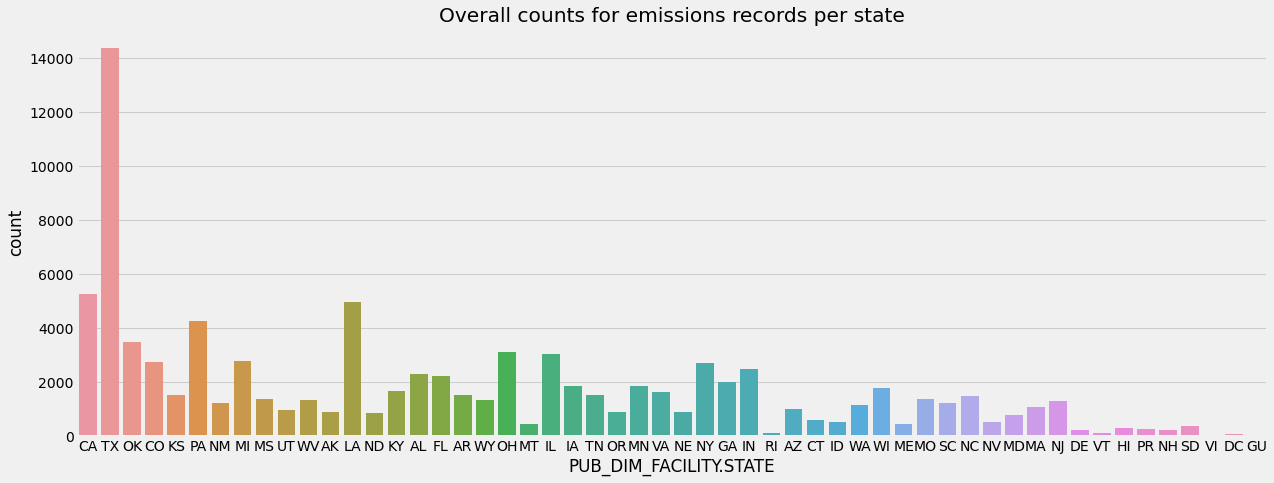

In [44]:
#seeing which states reported most times 
fig, states = plt.subplots(figsize = (19,7))
plt.style.use('fivethirtyeight')
states = sns.countplot(x ='PUB_DIM_FACILITY.STATE', data=ghg_full).set(title="Overall counts for emissions records per state")